In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d
from scipy.stats import pearsonr
plt.style.use(['science','notebook','grid'])

In [3]:
x=np.array([0,40.67,101.68,203.35,406.70,1016.75,2033.5])
y0=np.array([0,20.9,117.1,138.4,295,552.5,1093.2])

def func(x,a,b):
    return a*x+b

popt,pcov=curve_fit(func,x,y0)
a,b=popt
y1=a*x+b

r,p_v=pearsonr(x,y0)
correlacion= '\n'.join(('$R^2=%.4f$' %r**2,
                       '$R= %.4f$' %r ))

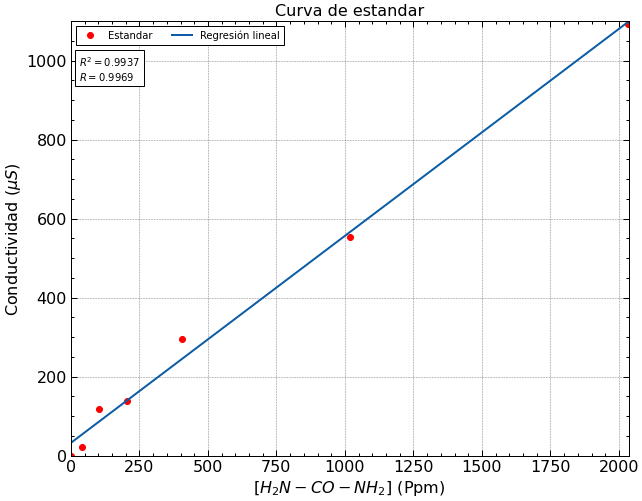

In [77]:
plt.figure(figsize=(10,8))
plt.plot(x,y0,'ro',label='Estandar')
plt.plot(x,y1,label='Regresión lineal')
plt.ylabel("Conductividad ($\mu S$)")
plt.xlabel('[$H_2N-CO-NH_2$] (Ppm)')
plt.xlim([-1,2035])
plt.ylim([-1,1100])
plt.legend(fontsize=10,ncol=2,fancybox=False,edgecolor='black')
plt.title('Curva de estandar' )
plt.text(30,950,correlacion, bbox=dict(facecolor='white',edgecolor='black'))
plt.show()
#plt.savefig("Curva.pdf",dpi=100)

In [124]:
A=np.array([[39,30.5,26.5],[27,23.7,20.5],[17.6,12.8,18.3],[27.9,26.8,22.9]])
a,b,c,d=np.interp(A,y0,x)
print('Los Rios:','\n',round(a[0],2),'Ppm','\n',round(a[1],2),'Ppm','\n',round(a[2],2),'Ppm')
print('Los Jardines:','\n',round(b[0],2),'Ppm','\n',round(b[1],2),'Ppm','\n',round(b[2],2),'Ppm')
print('La Livera:','\n',round(c[0],2),"Ppm",'\n',round(c[1],2),'Ppm','\n',round(c[2],2),'Ppm')
print('Lazurza','\n',round(d[0],2),'Ppm','\n',round(d[1],2),'Ppm','\n',round(d[2],2),'Ppm')

Los Rios: 
 52.15 Ppm 
 46.76 Ppm 
 44.22 Ppm
Los Jardines: 
 44.54 Ppm 
 42.45 Ppm 
 39.89 Ppm
La Livera: 
 34.25 Ppm 
 24.91 Ppm 
 35.61 Ppm
Lazurza 
 45.11 Ppm 
 44.41 Ppm 
 41.94 Ppm


In [52]:
x=np.array([0,40.67,101.68,203.35,406.70,1016.75,2033.5])
y=np.array([0,20.9,117.1,138.4,295,552.5,1093.2])

y_f=interp1d(x,y, kind='linear')
x_f=interp1d(y,x, kind='linear')


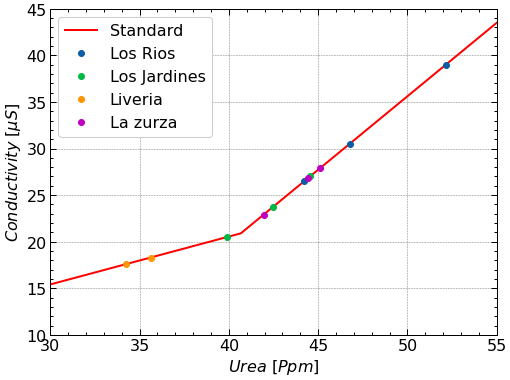

In [117]:
plt.plot(x,y_f(x),'r',label='Standard')
plt.plot(x_f(A[0]),A[0],'o',label='Los Rios')
plt.plot(x_f(A[1]),A[1],'o',label='Los Jardines')
plt.plot(x_f(A[2]),A[2],'o',label='Liveria')
plt.plot(x_f(A[3]),A[3],'mo',label='La zurza')
plt.xlim([30,55])
plt.ylim([10,45])
plt.xlabel('$ Urea$ $[Ppm]$')
plt.ylabel('$Conductivity$ $[\mu S]$')
plt.legend()